In [26]:
from pathlib import Path

import albumentations as A
import cv2
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
%load_ext autoreload
%autoreload 2
from nncomp_molecule import constants

In [3]:
train_df = pd.read_csv(constants.COMPETITION_DATADIR / "train_labels.csv")

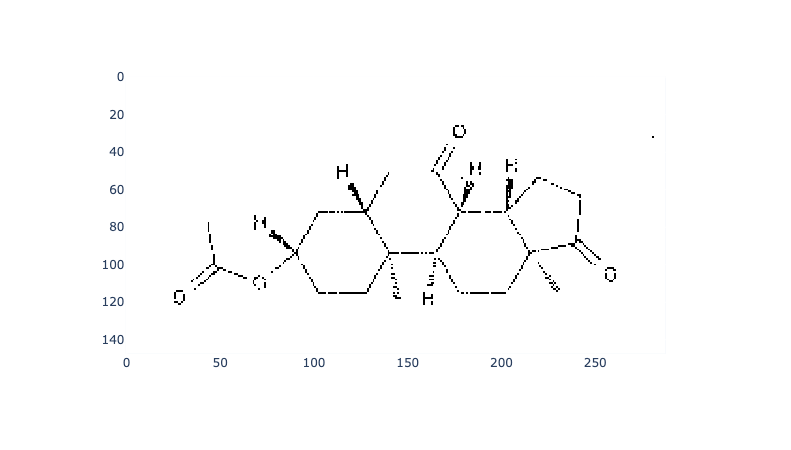

In [11]:
INDEX = 1

sample = train_df.iloc[INDEX]
sample.image_id

image_path = constants.COMPETITION_DATADIR / "train" / "/".join(sample.image_id[:3]) / f"{sample.image_id}.png"
image = cv2.imread(str(image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype("f")
px.imshow(image)

In [27]:
transforms = A.Compose(
    [A.Resize(height=224, width=224)]
)

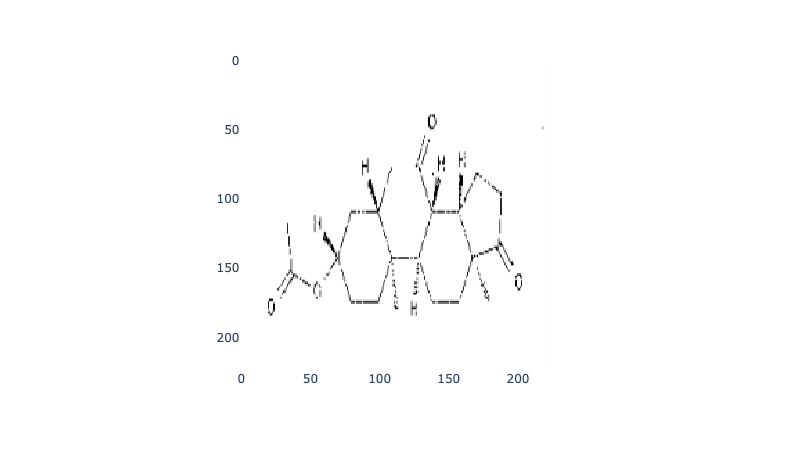

In [31]:
px.imshow(transforms(image=image)["image"])

/work/submodules/nncomp/src/nncomp/registry.py:49: UserWarning:

Factory with name 'AlbumentationCompose' is already present
Already registered: '<function AlbumentationCompose at 0x7fe8d61d9a60>'
New: '<function AlbumentationCompose at 0x7fe8cb0fa310>'



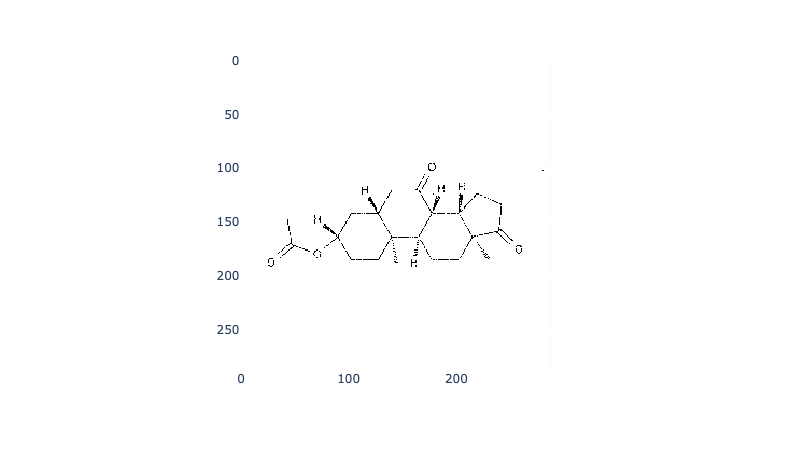

In [40]:
class LongestSizePadding(A.DualTransform):
    def __init__(self, pad_value=255, p=1.0, always_apply=False):
        super().__init__(always_apply, p)
        self.pad_value = pad_value
        
    def apply(self, image, **params):
        h, w, d = image.shape
        size = max(h, w)
        center, center_x, center_y = size // 2, w // 2, h // 2

        padded_image = np.full((size, size, d), 255, dtype=image.dtype)
        y = center - center_y
        x = center - center_x
        padded_image[y:y+h, x:x+w] = image
        return padded_image
    
px.imshow(LongestSizePadding()(image=image)["image"])